In [1]:
#Run this cell first by hitting the play button to load packages that you'll need in this exercise
from google.colab import drive
import matplotlib.pyplot as mplt
import numpy as np
import pandas as pd
import seaborn as sb

drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/DATASCI 154"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction

In this exercise, you analyze data from a field experiment on the effects of partisan media:

Guess, A.M., Barberá, P., Munzert, S. and Yang, J., 2021. The consequences of online partisan media. Proceedings of the National Academy of Sciences, 118(14).

In this experiment, participants were randomly assigned to one of three groups: 1) a group encouraged to change to their browser homepage to Huffington Post (and follow them on Facebook), 2) a group encouraged to change their browser homepage to Fox News (and follow them on Facebook), and 3) a control group with no encouragement at all.

You will compare pre-treatment browsing behavior of respondents by party id, verify that the encouragement design changed browsing behavior, and assess the treatment's impact on affective polarization.

You can access the full paper [here](https://doi.org/10.1073/pnas.2013464118). The design of the experiment is reproduced from the paper in the figure below.

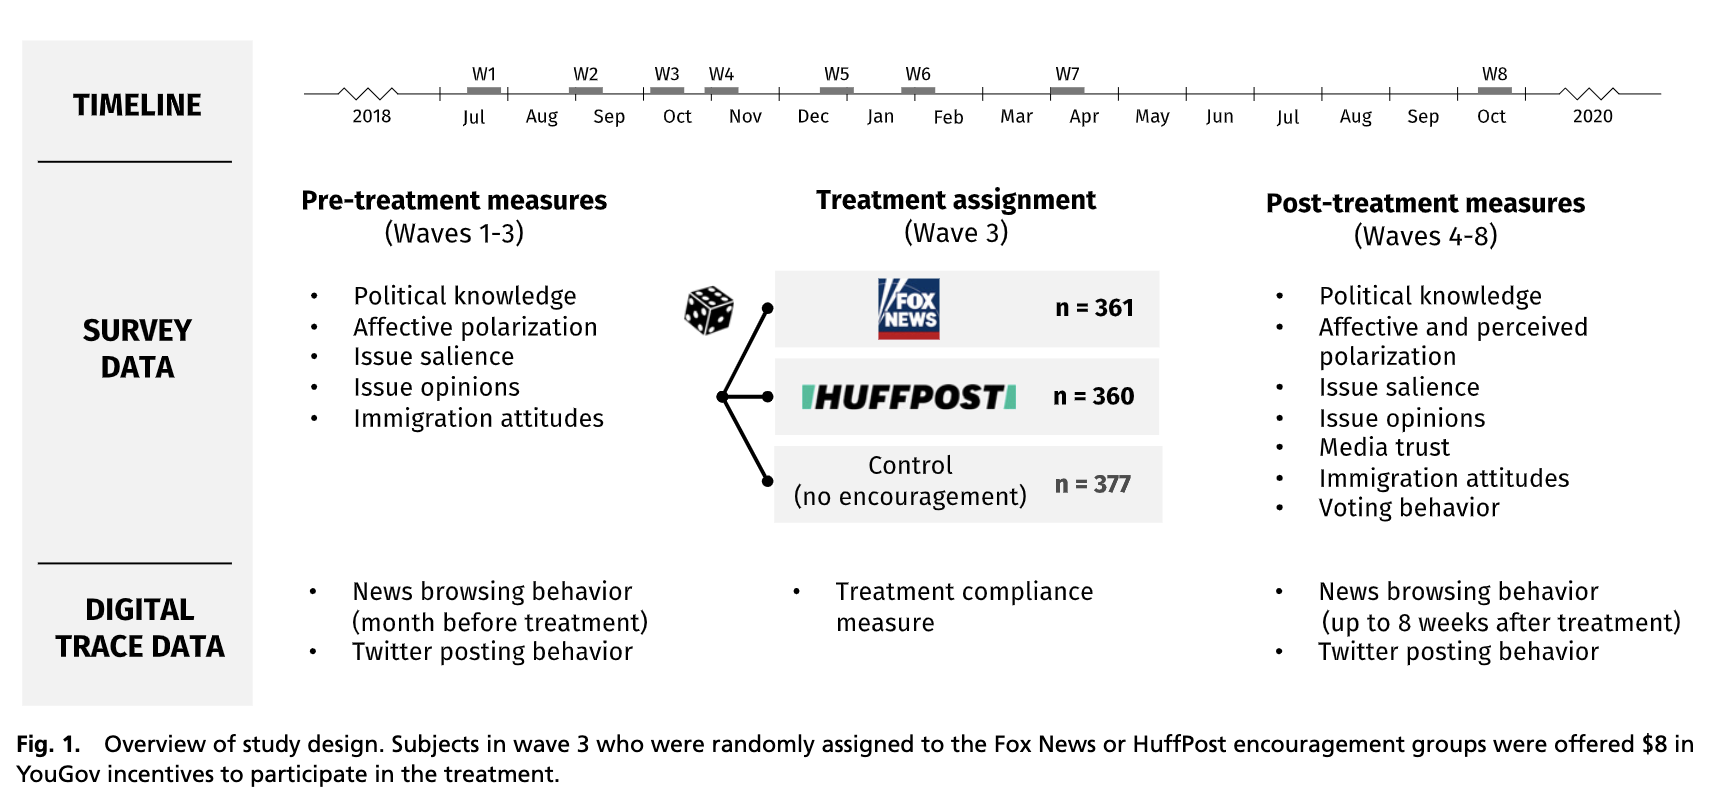

#Part 0: Data Wrangling
In this part, you will set up the data for analysis. The data comes with two files: `survey_data.csv`, which contains the participants' responses to the survey questions, and `daily_pulse_data.csv`, which contains daily summaries of participants' browsing behavior.

In Parts 1 and 2, we will need to analyze participants' browsing behavior by party id and treatment status, which are included in the survey file as `partylean` and `W3_PATA306_treatment_w3` respectively.

1. Load in the survey data file `survey_data.csv` and the usage data `daily_pulse_data.csv` using [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) from the `pandas` module. Drop participants that have a missing treatment assignment from the survey data (i.e., `W3_PATA306_treatment_w3` is `na`). Merge the two datasets together by `id`, keeping only the rows corresponding to participants with both survey data and usage data (hint: this is an inner join in [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)), and keep only the columns `id` (unique participant id), `date` (date of data collection), `W3_PATA306_treatment_w3` (treatment assignment), `partylean` (party id), `log_fn_day` (log of Fox News visits per day), and `log_hp_day` (log of HuffPost visits per day).

  Print the number of rows and columns in your merged dataset.



In [2]:
#use pd.read_csv() to load the survey data and the pulse data.
#The only argument to the argument to the pd.read_csv() function is the path or location of your file.
#The path will have this format '/content/drive/My Drive/NAME OF DATASET.csv' if you have saved the dataset in "My Drive" in your Google drive.
#Your code should have the format your_dataframe_name = pd.read_csv(path_name)
#After you read in the data, it will be stored in a dataframe called your_dataframe_name
#You can look at the dataframe by using your_dataframe_name.head(), which will print out the first five rows of the dataframe

survey_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/In-class/survey_data.csv")
pulse_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/In-class/daily_pulse_data.csv")
survey_df

,id,W1_pid3,W1_gender,W1_educ,party7,partylean,age,agesq,female,raceeth,...,predicted_house_winner_gop,predicted_vote_share_gop,predicted_district_winner_gop,predicted_house_winner_dem,predicted_vote_share_dem,predicted_district_winner_dem,prediction_certainty,W4_PATA462_a,W4_PATA462_b,W4_PATA462_c
0,0b9fb6fe532e69827f935cad3c01da4f,1,1,5,1.0,Democrat,63,3969,0,White,...,True,55.0,False,False,45.0,True,8.0,1.0,1.0,5.0
1,4197507f12350e6658bc08c285d4613e,1,2,6,1.0,Democrat,44,1936,1,White,...,False,NaN,False,True,NaN,True,7.0,1.0,1.0,5.0
2,f8b531355a063ef2ea63f7ddaa67c306,3,1,6,3.0,Democrat,42,1764,0,Asian / other,...,False,43.0,False,True,57.0,True,7.0,1.0,2.0,5.0
3,777b5e86cae0379e2ee4b7f21df46586,3,1,4,5.0,Republican,63,3969,0,White,...,True,53.0,True,False,47.0,False,10.0,5.0,5.0,1.0
4,341a9697fb54fd94ebd14b1e332c8d77,1,1,5,2.0,Democrat,75,5625,0,White,...,False,40.0,False,True,60.0,True,8.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,44f23a14a633922efcb691a5b935a26c,1,1,3,1.0,NaN,55,3025,0,Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,fc188e912b1ae54656805ba72c4d742f,1,1,3,2.0,NaN,54,2916,0,Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,0f4ca7fa88678d156bb493a894ea3502,3,2,3,3.0,NaN,43,1849,1,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337,f378fd5ea003691f51a923ac79d03ebc,1,2,4,1.0,NaN,46,2116,1,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Now, drop participants in the survey data who are missing treatment status using the dropna function.
#In the survey data, the treatment status is stored in the variable 'W3_PATA306_treatment_w3'

survey_df.dropna(subset=["W3_PATA306_treatment_w3"], how="all", inplace=True)

In [4]:
#Now, we want to merge the survey dataframe and the pulse dataframe.
#Both datasets have the a variable called 'id' that stores the participant id. You will want to merge on this variable.
#We only want to keep rows that coorespond to participants that are present in both the survey data AND the pulse data.
#This means we want to do an inner merge.

merged_df = pd.merge(survey_df, pulse_df, left_on=["id"], right_on=["id"], how="inner")
merged_df

,id,W1_pid3,W1_gender,W1_educ,party7,partylean,age,agesq,female,raceeth,...,prop_cons_day,prop_lib_day,prop_hp_day,prop_fn_day,log_cons_day,log_lib_day,log_hp_day,log_fn_day,log_dur_hp_day,log_dur_fn_day
0,f8b531355a063ef2ea63f7ddaa67c306,3,1,6,3.0,Democrat,42,1764,0,Asian / other,...,0.015873,0.037698,0.0,0.0,0.954243,1.301030,0.0,0.0,0.0,0.0
1,f8b531355a063ef2ea63f7ddaa67c306,3,1,6,3.0,Democrat,42,1764,0,Asian / other,...,0.018519,0.044160,0.0,0.0,1.146128,1.505150,0.0,0.0,0.0,0.0
2,f8b531355a063ef2ea63f7ddaa67c306,3,1,6,3.0,Democrat,42,1764,0,Asian / other,...,0.000000,0.107143,0.0,0.0,0.000000,0.602060,0.0,0.0,0.0,0.0
3,f8b531355a063ef2ea63f7ddaa67c306,3,1,6,3.0,Democrat,42,1764,0,Asian / other,...,0.005882,0.052941,0.0,0.0,0.301030,1.000000,0.0,0.0,0.0,0.0
4,f8b531355a063ef2ea63f7ddaa67c306,3,1,6,3.0,Democrat,42,1764,0,Asian / other,...,0.012632,0.021053,0.0,0.0,0.845098,1.041393,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56101,2bf7a1a032c184f2505cdb7b63989d4d,2,1,5,6.0,Republican,39,1521,0,White,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
56102,2bf7a1a032c184f2505cdb7b63989d4d,2,1,5,6.0,Republican,39,1521,0,White,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
56103,2bf7a1a032c184f2505cdb7b63989d4d,2,1,5,6.0,Republican,39,1521,0,White,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
56104,2bf7a1a032c184f2505cdb7b63989d4d,2,1,5,6.0,Republican,39,1521,0,White,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [5]:
#Now, we want to only keep 6 columns in our new merged dataframe.
#The columns we want to keep are the variables: 'id', 'date', 'W3_PATA306_treatment_w3', 'partylean', 'log_fn_day', and 'log_hp_day'

merged_df = merged_df.loc[:, ['id', 'date', 'W3_PATA306_treatment_w3', 'partylean', 'log_fn_day', 'log_hp_day']]
merged_df

,id,date,W3_PATA306_treatment_w3,partylean,log_fn_day,log_hp_day
0,f8b531355a063ef2ea63f7ddaa67c306,2018-08-30,FoxNews,Democrat,0.0,0.0
1,f8b531355a063ef2ea63f7ddaa67c306,2018-08-31,FoxNews,Democrat,0.0,0.0
2,f8b531355a063ef2ea63f7ddaa67c306,2018-09-01,FoxNews,Democrat,0.0,0.0
3,f8b531355a063ef2ea63f7ddaa67c306,2018-09-03,FoxNews,Democrat,0.0,0.0
4,f8b531355a063ef2ea63f7ddaa67c306,2018-09-04,FoxNews,Democrat,0.0,0.0
...,...,...,...,...,...,...
56101,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-10,Control,Republican,0.0,0.0
56102,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-11,Control,Republican,0.0,0.0
56103,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-13,Control,Republican,0.0,0.0
56104,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-14,Control,Republican,0.0,0.0


In [6]:
#Finally, print the number of rows and columns in your merged dataframe.
#You can do this by using shape. Examples of how to use shape are in Part 0 of the coding tutorial.
merged_df.shape

(56106, 6)

2. The treatment was administered on Oct. 5, 2018. Create a new variable that expresses the date in terms of the number of days relative to the day the treatment was administered. For example, the date Oct. 7, 2018 would be coded as 2, and Oct. 3, 2018 would be coded as -2. Hint: It will be helpful to use [`pd.to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [7]:
#First, make sure that your 'date' variable in your merged dataframe is a datetime object.
#To do this, use pd.to_datetime

merged_df["date"] = pd.to_datetime(merged_df["date"])

In [8]:
#Now, create a new variable that expresses the date in terms of the number of days before or after October 5,2018.

merged_df["relative date"] = merged_df["date"] - pd.to_datetime("2018-10-05")
merged_df

,id,date,W3_PATA306_treatment_w3,partylean,log_fn_day,log_hp_day,relative date
0,f8b531355a063ef2ea63f7ddaa67c306,2018-08-30,FoxNews,Democrat,0.0,0.0,-36 days
1,f8b531355a063ef2ea63f7ddaa67c306,2018-08-31,FoxNews,Democrat,0.0,0.0,-35 days
2,f8b531355a063ef2ea63f7ddaa67c306,2018-09-01,FoxNews,Democrat,0.0,0.0,-34 days
3,f8b531355a063ef2ea63f7ddaa67c306,2018-09-03,FoxNews,Democrat,0.0,0.0,-32 days
4,f8b531355a063ef2ea63f7ddaa67c306,2018-09-04,FoxNews,Democrat,0.0,0.0,-31 days
...,...,...,...,...,...,...,...
56101,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-10,Control,Republican,0.0,0.0,-25 days
56102,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-11,Control,Republican,0.0,0.0,-24 days
56103,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-13,Control,Republican,0.0,0.0,-22 days
56104,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-14,Control,Republican,0.0,0.0,-21 days


3. The authors made a couple of decisions in cleaning the data. Often it's in the data cleaning steps where consequential decisions (and mistakes) are made. Implement the following data cleaning steps that the authors took:

*   Drop the data from Nov. 19, 2018
*   Keep only data between 30 days before the treatment and 50 days after the treatment (inclusive)

In [9]:
#First, we want to drop rows that have the date of Nov 19, 2018.
#Here the condition is that the 'date' does not equal November 19,2018.
#The symbol for does not equals is !=
#Pseduo code for this is your_dataframe = your_dataframe[your_dataframe['date'] not equals pd.to_datetime('2018-11-19')]

merged_df = merged_df[merged_df['date'] != pd.to_datetime('2018-11-19')]

In [10]:
#Now we want to keep rows where the time since the treatment is between -30 and 50 days
#This is an example of keeping rows that meet two conditions, like the example in Section 1 of the coding tutorial for last mile rides
#A caveat is that you need to convert -30 and -50 to something that datetime understands.
#You can do this in your condition by typing pd.Timedelta(days = -30) instead of just -30.

merged_df = merged_df[(merged_df['relative date'] >= pd.Timedelta(days=-30)) & (merged_df['relative date'] <= pd.Timedelta(days=50))]
merged_df

,id,date,W3_PATA306_treatment_w3,partylean,log_fn_day,log_hp_day,relative date
5,f8b531355a063ef2ea63f7ddaa67c306,2018-09-05,FoxNews,Democrat,0.0,0.0,-30 days
6,f8b531355a063ef2ea63f7ddaa67c306,2018-09-06,FoxNews,Democrat,0.0,0.0,-29 days
7,f8b531355a063ef2ea63f7ddaa67c306,2018-09-07,FoxNews,Democrat,0.0,0.0,-28 days
8,f8b531355a063ef2ea63f7ddaa67c306,2018-10-09,FoxNews,Democrat,0.0,0.0,4 days
9,f8b531355a063ef2ea63f7ddaa67c306,2018-10-10,FoxNews,Democrat,0.0,0.0,5 days
...,...,...,...,...,...,...,...
56101,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-10,Control,Republican,0.0,0.0,-25 days
56102,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-11,Control,Republican,0.0,0.0,-24 days
56103,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-13,Control,Republican,0.0,0.0,-22 days
56104,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-14,Control,Republican,0.0,0.0,-21 days


# Part 1: Pre-treatment browsing behavior

In this part, you will compare pre-treatment browsing behavior by the participants' party id.

4. There is too much noise in the daily data, so we are going to look at behavior aggregated by week. Create a new variable that represents the **week relative to the treatment start week**. The week before the treatment (September 28 - October 4, 2018), your new variable should have a value of -1. The treatment start week (October 5-12, 2018) should be coded as week 0. The week after the treatment (October 12-18, 2018), your new variable should have a value of 1. All other weeks should be coded accordingly, following this pattern.

  Hint: It may be helpful to use [`np.ceil`](https://numpy.org/doc/stable/reference/generated/numpy.ceil.html) or [`np.floor`](https://numpy.org/doc/stable/reference/generated/numpy.floor.html).

In [11]:
#It will be helpful to create a new variable for use in our calculations.
#Currently, the variable you created in question 2 of part 0 is a datetime object.
#We want to convert it to an number, so that you can use it in your calculations.
#Pseduo code for how to do this is your_df[new_variable_name] = your_df[variable_name_from_q2].dt.days

merged_df["relative days"] = merged_df["relative date"].dt.days

In [12]:
#Now, you can use numpy floor (np.floor) or numpy ceiling (np.ceil) to come up with a calculation that converts days to weeks.

merged_df["relative week"] = np.floor(merged_df["relative days"]/7)

In [13]:
#How to check your work?
#Look at the rows in the data frame that coorespond to a particular date, and make sure that your new week variable has the value it should
#To select rows with a particular date, for example October 6, 2018, you can use the code your_df[your_df['date'] == '2018-10-06']

merged_df[merged_df["date"] == "2018-10-06"]

,id,date,W3_PATA306_treatment_w3,partylean,log_fn_day,log_hp_day,relative date,relative days,relative week
65,7fed1a3435d2ab1d884cb3daa7580bf3,2018-10-06,Control,Republican,0.000000,0.0,1 days,1,0.0
138,42460ddf822ddfb5521e07ee1741a806,2018-10-06,FoxNews,Independent,1.477121,0.0,1 days,1,0.0
181,0d3c5d101043a7def8fce68d89bc3b1e,2018-10-06,FoxNews,Democrat,0.000000,0.0,1 days,1,0.0
252,fb2753848d3070e95c01f03a96f6c2a2,2018-10-06,HuffPost,Independent,0.000000,0.0,1 days,1,0.0
339,7225079fb392000db6e821fbc67b6740,2018-10-06,Control,Democrat,0.000000,0.0,1 days,1,0.0
...,...,...,...,...,...,...,...,...,...
55619,fd418053981b75f8cee09a91e5ea84ae,2018-10-06,Control,NaN,0.000000,0.0,1 days,1,0.0
55691,218039e1e70dfc8e682b1d82e591a1d9,2018-10-06,FoxNews,Democrat,0.301030,0.0,1 days,1,0.0
55804,49e04c5db09657f2920b24fb0e78b009,2018-10-06,FoxNews,Democrat,0.000000,0.0,1 days,1,0.0
55880,8b312c91db13c340edb79df59cb88a7f,2018-10-06,FoxNews,Republican,0.000000,0.0,1 days,1,0.0


5. The experimental design assumes that Huffington Post and Fox News are "partisan websites." Verify this by comparing the pre-treatment visits to each site by party id.

  Make a graph where the x-axis is the week variable you created in #4 and the y-axis shows log visits to Fox News, averaged across days and indiviuals in a party. Plot three lines, one for Republicans, Democrats, and Independents. Only show **pre-treatment** weeks (weeks -5 to -1). Repeat to make a second figure that shows average log visits per week by party to Huffington Post.

  Hint: It may be helpful to use the variables 'log_fn_day', 'log_hp_day', and 'partylean' and [`sns.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html) with the estimator parameter set to 'mean'


In [14]:
#First, only keep rows that meet the condition of being from weeks -5 to -1

pretreat_data = merged_df.loc[((merged_df["relative week"] <= -1) &
                                                    (merged_df["relative week"] >= -5))]
pretreat_data

,id,date,W3_PATA306_treatment_w3,partylean,log_fn_day,log_hp_day,relative date,relative days,relative week
5,f8b531355a063ef2ea63f7ddaa67c306,2018-09-05,FoxNews,Democrat,0.0,0.0,-30 days,-30,-5.0
6,f8b531355a063ef2ea63f7ddaa67c306,2018-09-06,FoxNews,Democrat,0.0,0.0,-29 days,-29,-5.0
7,f8b531355a063ef2ea63f7ddaa67c306,2018-09-07,FoxNews,Democrat,0.0,0.0,-28 days,-28,-4.0
39,7fed1a3435d2ab1d884cb3daa7580bf3,2018-09-05,Control,Republican,0.0,0.0,-30 days,-30,-5.0
40,7fed1a3435d2ab1d884cb3daa7580bf3,2018-09-07,Control,Republican,0.0,0.0,-28 days,-28,-4.0
...,...,...,...,...,...,...,...,...,...
56101,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-10,Control,Republican,0.0,0.0,-25 days,-25,-4.0
56102,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-11,Control,Republican,0.0,0.0,-24 days,-24,-4.0
56103,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-13,Control,Republican,0.0,0.0,-22 days,-22,-4.0
56104,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-14,Control,Republican,0.0,0.0,-21 days,-21,-3.0


In [15]:
#Now, only keep rows that meet the condition of 'partylean' being Democrat, Republican or Independent

pretreat_data = pretreat_data[merged_df["partylean"].isin(["Democrat", "Republican", "Independent"])]
pretreat_data

<ipython-input-15-ae69ead5d50d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pretreat_data = pretreat_data[merged_df["partylean"].isin(["Democrat", "Republican", "Independent"])]


,id,date,W3_PATA306_treatment_w3,partylean,log_fn_day,log_hp_day,relative date,relative days,relative week
5,f8b531355a063ef2ea63f7ddaa67c306,2018-09-05,FoxNews,Democrat,0.0,0.0,-30 days,-30,-5.0
6,f8b531355a063ef2ea63f7ddaa67c306,2018-09-06,FoxNews,Democrat,0.0,0.0,-29 days,-29,-5.0
7,f8b531355a063ef2ea63f7ddaa67c306,2018-09-07,FoxNews,Democrat,0.0,0.0,-28 days,-28,-4.0
39,7fed1a3435d2ab1d884cb3daa7580bf3,2018-09-05,Control,Republican,0.0,0.0,-30 days,-30,-5.0
40,7fed1a3435d2ab1d884cb3daa7580bf3,2018-09-07,Control,Republican,0.0,0.0,-28 days,-28,-4.0
...,...,...,...,...,...,...,...,...,...
56101,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-10,Control,Republican,0.0,0.0,-25 days,-25,-4.0
56102,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-11,Control,Republican,0.0,0.0,-24 days,-24,-4.0
56103,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-13,Control,Republican,0.0,0.0,-22 days,-22,-4.0
56104,2bf7a1a032c184f2505cdb7b63989d4d,2018-09-14,Control,Republican,0.0,0.0,-21 days,-21,-3.0


<Axes: xlabel='relative week', ylabel='log_fn_day'>

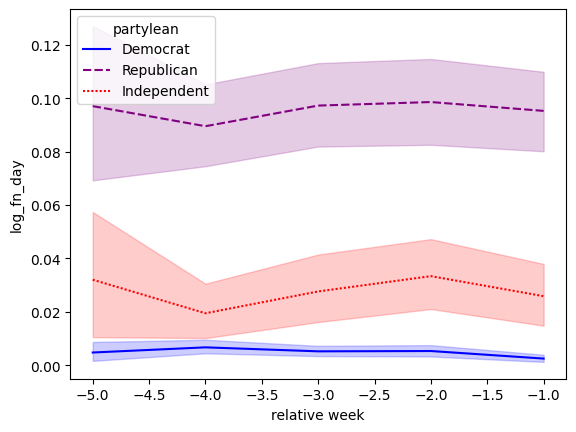

In [29]:
#Now use the lineplot function in the seaborn package to aggregate and graph the data cooresponding to visits to Fox News (the log_fn_day variable).

sb.lineplot(pretreat_data, x="relative week", y="log_fn_day", hue = 'partylean', palette=['blue','purple','red'],
              markers = True, style = 'partylean', estimator="mean")
# mplt.title()
# mplt.xlabel()
# mplt.ylabel()
# mplt.show()

In [18]:
#Now repeat to graph the data cooresponding to visits to Huffington Post (the log_hp_day variable)

YOUR CODE HERE

SyntaxError: ignored

6. If you completed question 5, you would have generated the following graphs. Please interpret the graphs and briefly comment on how pre-treatment usage varies by party id for each site and whether these two sites are "ideologically extreme".

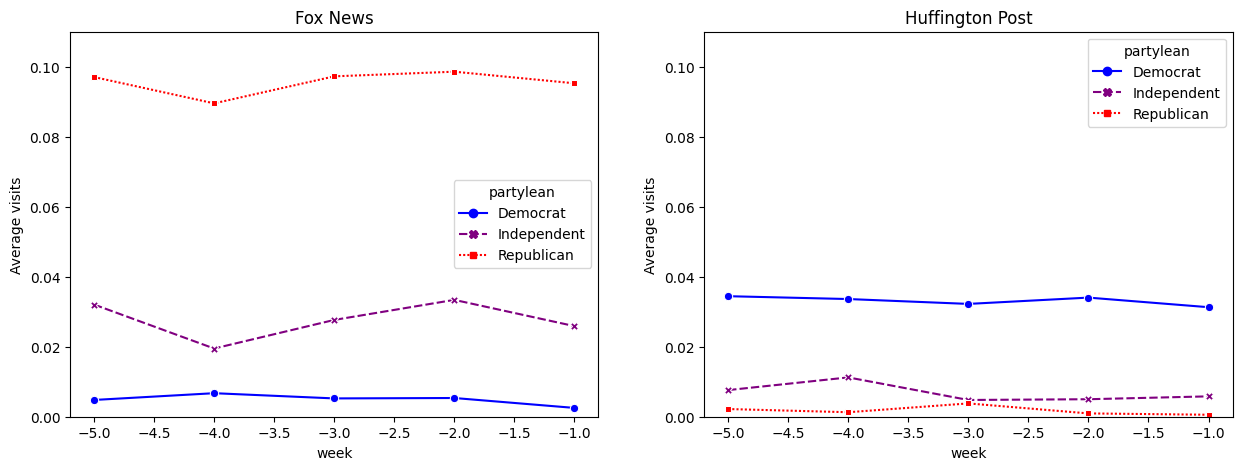

**YOUR INTERPRETATION HERE**

#Part 2: Verify encouragement design

In this part, you will verify that the encouragment design worked as intended and induced participants in the treatment groups to visit a partisan website more often.

7. Make a graph where the x-axis is the week variable you created in #4 and the y-axis shows log visits to Fox News, averaged across days and indiviuals in a treatment group. Plot three lines, one for the Huffington Post treatment group, one for the Fox News treatment group, and one for the control group. Add a vertical line to the figure to indicate when the treatment was administered. Repeat to make a second plot that shows average log visits per week by treatment group to Huffington Post.

In [ ]:
#Hint: use similar methods as in question 6

YOUR CODE HERE


8. If you coded question 7, you would have produced the following graphs. Please interpet these graphs. Did the encouragement design succeed in changing behavior? Why or why not? Do you think there's a difference in the success of the treatments? If yes, explain why.

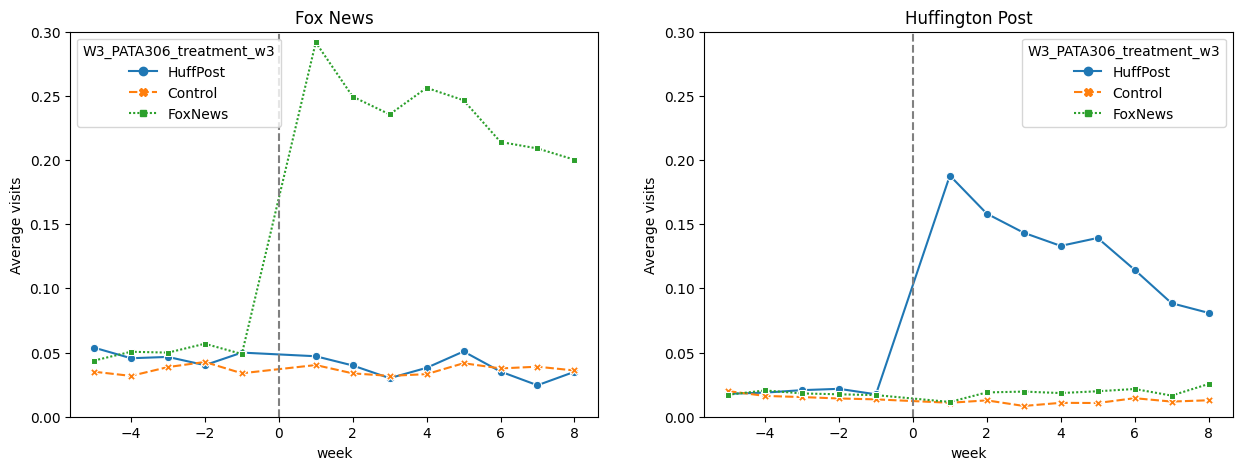

**YOUR INTERPRETATION HERE**

#Part 3: Assess impact on affective polarization

In this part, you will assess the impact of the treatment on affective polarization.

Our measure of affective polarization comes from the following two survey questions:

**`W4_PATA450a`: AFFECTIVE POLARIZATION DEMOCRATS FEELING THERMOMETER**

*We would like to get your feelings toward Democrats using something we call the feeling thermometer.
Ratings between 50 degrees and 100 degrees mean that you feel favorable and warm toward the group.
Ratings between 0 degrees and 50 degrees mean that you don’t feel favorable toward the group and that
you don’t care too much for that group. You would rate the group at the 50 degree mark if you don’t feel
particularly warm or cold toward the group.*
1. 0
2. ...
3. 100

**`W4_PATA450b`: AFFECTIVE POLARIZATION REPUBLICANS FEELING THERMOMETER**

*We now would like to get your feelings toward Republicans using the same feeling thermometer.*
1. 0
2. ...
3. 100

9. We have a measure of participants' ideological leanings in a variable called `party7`. Values 1-3 indicate the participant has liberal views, while values 5-7 indicate the participant has conservative views. Using `survey_data.csv`, compute the measure of affective polarization as follows and briefly explain what this measure you are constructing captures:

- For participants with a value of `party7` between 1 and 3 (inclusive), compute the measure as `W4_PATA450a` - `W4_PATA450b`.
- For participants with a value of `party7` between 5 and 7 (inclusive), compute the measure as `W4_PATA450b` - `W4_PATA450a`.
- For all other participants, set the measure to `np.nan`.

In [ ]:
#compute the affective polarization measure
#code from last week's session is below

#svy_data['affpol'] = np.nan
#svy_data.loc[(svy_data.party7 < 4), 'affpol'] = svy_data.loc[(svy_data.party7 < 4), 'W4_PATA450a'] - svy_data.loc[(svy_data.party7 < 4), 'W4_PATA450b']
#svy_data.loc[(svy_data.party7 > 4), 'affpol'] = svy_data.loc[(svy_data.party7 > 4), 'W4_PATA450b'] - svy_data.loc[(svy_data.party7 > 4), 'W4_PATA450a']

10. In the paper, the authors standardize all their outcome measures. Standardize the measure of affective polarization you computed in #9 by dividing by the standard deviation of affective polarization in the **control group**. Hint: It may be helpful to use the variable 'W3_PATA306_treatment_w3' and panda's [`std`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) function.

In [ ]:
#compute and divide by control sd

YOUR CODE HERE

11. Write a function to compute two difference in means: one for the difference in standardized polarization between the Fox News group and the control group, and one for the difference in standardized polarization between the Huffington Post group and the control group. Report the values you calculate. Hint: It may be helpful to use [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) with the parameter 'skipna' set to its default value of True.

In [ ]:
#function to compute difference in means

YOUR CODE HERE

12. In interpreting their results, the authors write:

  "The intervention can be interpreted as boosting incidental exposure to partisan content in a way that might be comparable to seeing posts from weak ties on social media (e.g., retweets or reshares) that are more likely to be political and counterattitudinal in nature."

  What can these results say more broadly about the relationship between partisan social media and affective polarization? What are the strengths of the study? What are the limitations of the study?

**YOUR INTERPRETATION HERE**